In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_excel("C:\\Users\\Lenovo\\OneDrive\\Bureau\\smoke_detection_iot.xlsx")
data.head()
#UTC : heure à laquelle l'expérience a été réalisée \ horloge
#Température[C] : température ambiante, mesurée en degrés Celsius
#Humidité[%] : humidité de l'air pendant l'expérience
#COVT[ppb] : composés organiques volatils totaux, mesurés en ppb (parties par milliard)
#eCO2[ppm] : concentration équivalente de CO2, mesurée en ppm (parties par million)
#H2 brut : la quantité d’hydrogène brut [hydrogène moléculaire brut ; non compensé (Biais, Température etc.)] présent dans l'environnement
#Éthanol brut : la quantité d'éthanol brut présente dans l'environnement
#Pression [hPa] : pression atmosphérique, mesurée en hPa
#PM1.0 : matière particulaire d'un diamètre inférieur à 1,0 micromètre/ capteur de diametre de poussière  /qualité de l'aire
#PM2,5 : particules de diamètre inférieur à 2,5 micromètres 

#NC0.5 : Concentration de particules de diamètre inférieur à 0,5 micromètre 
#NC1.0 : Concentration de particules d'un diamètre inférieur à 1,0 micromètre
#NC2.5 : Concentration de particules de diamètre inférieur à 2,5 micromètres
#CNT : nombre d'échantillons.
#Alarme de fumée (réalité) Si un fumée était présent, la valeur est 1, sinon elle est 0import pandas as pd


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Smoke Alarm
0,0,1654733331,20.000,57.36,0.0,400,12306.0,18520.0,939.735,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1654733332,20.015,56.67,0.0,400,12345.0,18651.0,939.744,0.0,0.0,0.0,0.0,0.0,1.0,0
2,2,1654733333,20.029,55.96,0.0,400,12374.0,18764.0,939.738,0.0,0.0,0.0,0.0,0.0,2.0,0
3,3,1654733334,20.044,55.28,0.0,400,12390.0,18849.0,939.736,0.0,0.0,0.0,0.0,0.0,3.0,0
4,4,1654733335,20.059,54.69,0.0,400,12403.0,18921.0,939.744,0.0,0.0,0.0,0.0,0.0,4.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  object 
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62571 non-null  float64
 3   Humidity[%]     62627 non-null  float64
 4   TVOC[ppb]       62573 non-null  float64
 5   eCO2[ppm]       62596 non-null  object 
 6   Raw H2          62627 non-null  float64
 7   Raw Ethanol     62628 non-null  float64
 8   Pressure[hPa]   62595 non-null  float64
 9   PM1.0           62609 non-null  object 
 10  PM2.5           62628 non-null  object 
 11  NC0.5           62629 non-null  float64
 12  NC1.0           62629 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62628 non-null  float64
 15  Smoke Alarm     62630 non-null  int64  
dtypes: float64(10), int64(2), object(4)
memory usage: 7.6+ MB


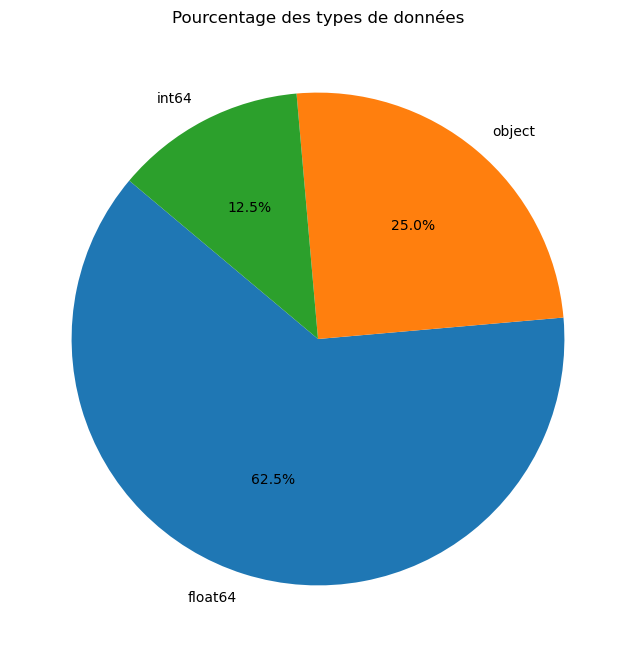

In [18]:
data.info()


dtype_percentage = data.dtypes.value_counts(normalize=True) * 100

# Créer un diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(dtype_percentage, labels=dtype_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Pourcentage des types de données')
plt.show()

In [52]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,NC1.0,NC2.5,CNT,Smoke Alarm
count,6.263000e+04,62571.000000,62627.000000,62573.000000,62627.000000,62628.000000,62595.000000,62629.000000,62629.000000,62630.000000,62628.000000,62630.000000
mean,1.654792e+09,15.972969,48.539376,1936.578732,12942.464496,19754.251086,938.627485,491.471381,203.589723,80.049042,10511.666363,0.714626
std,1.100025e+05,14.360368,8.865526,7790.688000,272.466179,609.521616,1.331517,4265.694863,2214.756089,1083.383189,7597.826821,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,11.009500,47.530000,130.000000,12830.000000,19435.000000,938.700000,8.820000,1.384000,0.033000,3626.000000,0.000000
50%,1.654762e+09,20.130000,50.150000,982.000000,12924.000000,19501.000000,938.816000,12.450000,1.943000,0.044000,9336.500000,1.000000
75%,1.654778e+09,25.410000,53.240000,1189.000000,13109.000000,20078.000000,939.417000,14.420000,2.249000,0.051000,17165.000000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,13803.000000,21410.000000,939.861000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [3]:
#Prétraitement  
missing_values = data.isna().sum()
data.isna().sum()

Unnamed: 0         0
UTC                0
Temperature[C]    59
Humidity[%]        3
TVOC[ppb]         57
eCO2[ppm]         34
Raw H2             3
Raw Ethanol        2
Pressure[hPa]     35
PM1.0             21
PM2.5              2
NC0.5              1
NC1.0              1
NC2.5              0
CNT                2
Smoke Alarm        0
dtype: int64

In [4]:
data=data.fillna(method='ffill')
data.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Smoke Alarm       0
dtype: int64

In [5]:
contains_dollar = data.applymap(lambda x: '$' in str(x))
dollar_count_per_column = contains_dollar.sum()
dollar_count_per_column[dollar_count_per_column.gt(0)]

eCO2[ppm]    29
PM1.0        13
PM2.5         1
dtype: int64

In [6]:
data.replace({'\$': None}, regex=True, inplace=True)
data = data.fillna(method='ffill')
contains_dollar_after_replace = data.applymap(lambda x: '$' in str(x))
contains_dollar_after_replace.any().any()

False

In [7]:
data.duplicated().sum()

0

In [8]:
from datetime import datetime, timedelta


# Définir la date de départ pour la conversion des timestamps Unix
start = datetime(1970, 1, 1)

# Convertir les timestamps Unix en objets datetime et stocker le résultat dans une nouvelle colonne 'datetime'
data['datetime'] = data['UTC'].apply(lambda x: start + timedelta(seconds=x))

# Supprimer la colonne 'UTC' qui contient les timestamps Unix
data.drop('UTC', axis=1, inplace=True)

# Convertir la colonne 'datetime' en objet datetime si nécessaire
data['datetime'] = pd.to_datetime(data['datetime'])

# Définir la colonne 'datetime' comme index si nécessaire
data.set_index('datetime', inplace=True)

In [9]:

columns_to_drop = ['Unnamed: 0', 'CNT']
data.drop(columns=columns_to_drop, inplace=True)

data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Smoke Alarm
datetime,,,,,,,,,,,,,
2022-06-09 00:08:51,20.000,57.36,0.0,400.0,12306.0,18520.0,939.735,0.0,0.0,0.0,0.0,0.0,0
2022-06-09 00:08:52,20.015,56.67,0.0,400.0,12345.0,18651.0,939.744,0.0,0.0,0.0,0.0,0.0,0
2022-06-09 00:08:53,20.029,55.96,0.0,400.0,12374.0,18764.0,939.738,0.0,0.0,0.0,0.0,0.0,0
2022-06-09 00:08:54,20.044,55.28,0.0,400.0,12390.0,18849.0,939.736,0.0,0.0,0.0,0.0,0.0,0
2022-06-09 00:08:55,20.059,54.69,0.0,400.0,12403.0,18921.0,939.744,0.0,0.0,0.0,0.0,0.0,0


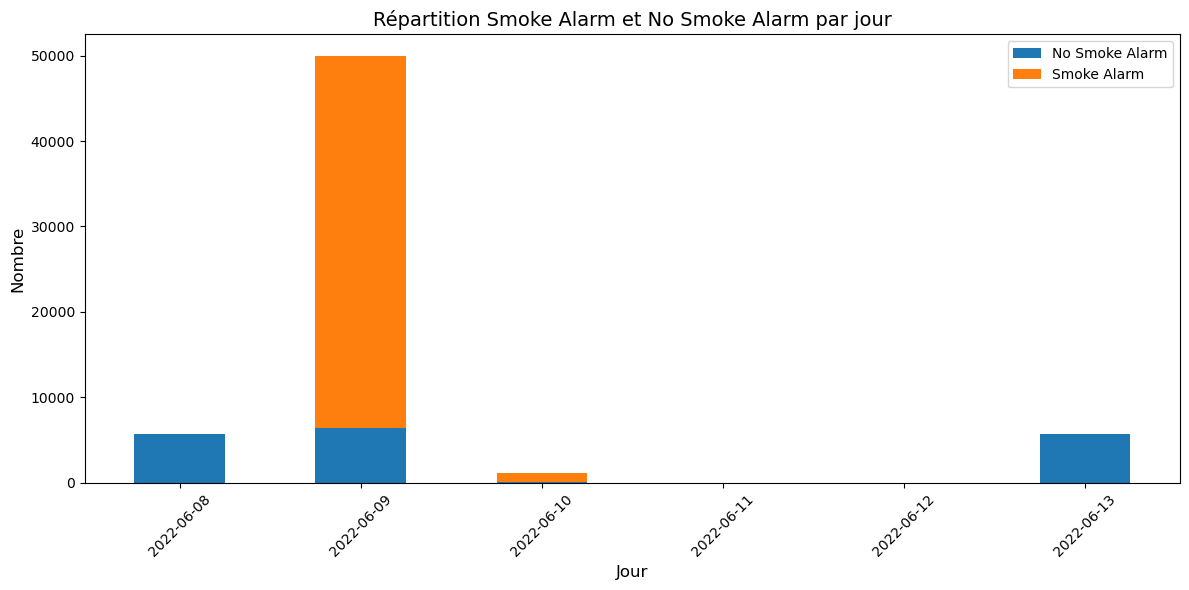

In [12]:
data['Smoke Alarm State'] = data['Smoke Alarm'].astype(int)

# Regrouper les données par jour et compter les occurrences
resampled_data = data.resample('D').sum()

# Compter les occurrences de Smoke Alarms et No Smoke Alarms
smoke_alarm_counts = resampled_data['Smoke Alarm State']
no_smoke_alarm_counts = data.resample('D').size() - smoke_alarm_counts

# Tracer l'histogramme
plt.figure(figsize=(12, 6))

indices = resampled_data.index

# Utilisez des couleurs appropriées
plt.bar(indices, no_smoke_alarm_counts, width=0.5, color='tab:blue',label='No Smoke Alarm')  # Bleu pour "No Fire Alarm"
plt.bar(indices, smoke_alarm_counts, width=0.5, bottom=no_smoke_alarm_counts, color='tab:orange', label='Smoke Alarm') # Orange pour "Fire Alarm"

plt.xlabel('Jour', fontsize=12)
plt.ylabel('Nombre', fontsize=12)
plt.title('Répartition Smoke Alarm et No Smoke Alarm par jour', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout() 
plt.show()

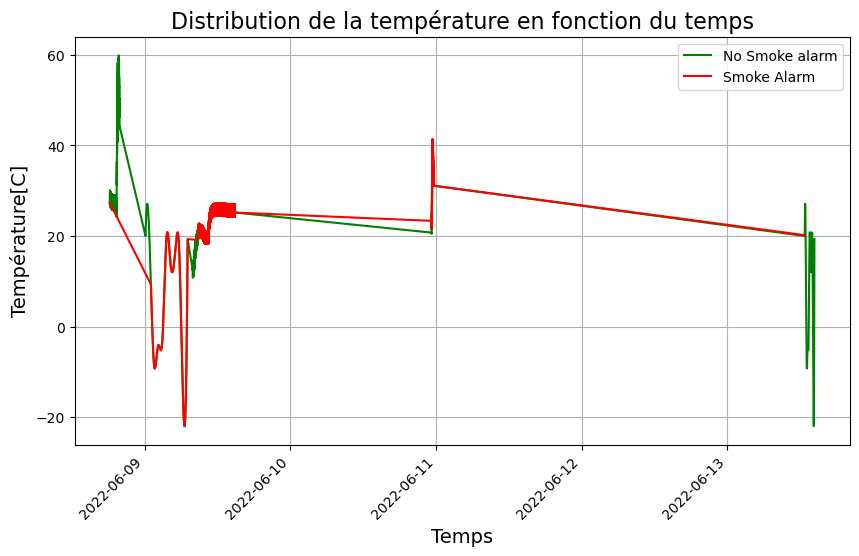

In [23]:
mask_fire_alarm = data['Smoke Alarm'] == 1
plt.figure(figsize=(10, 6))
#plt.plot(data.index, data['Temperature[C]'], color='green', label='No Fire Alarm')
#plt.plot(data.index[mask_fire_alarm], data['Temperature[C]'][mask_fire_alarm], color='red', label='Fire Alarm')
data['Temperature[C]'].plot(color='green', label='No Smoke alarm')
data.loc[mask_fire_alarm, 'Temperature[C]'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('Température[C]', fontsize=14)
plt.title('Distribution de la température en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

In [24]:
#La répartition de la température est asymétrique. La plupart des températures varient entre 12 et 28 degrés Celsius.
#La majorité des "qui déclenche" une alarme feu de 18 à 28 .
#La plupart des températures ne diminuent pas considérablement entre 12°C et 28°C.
#La température moyenne sans alerte  est de 19,69°C.
#La température d'alarme moyenne est de 14,48 °C.


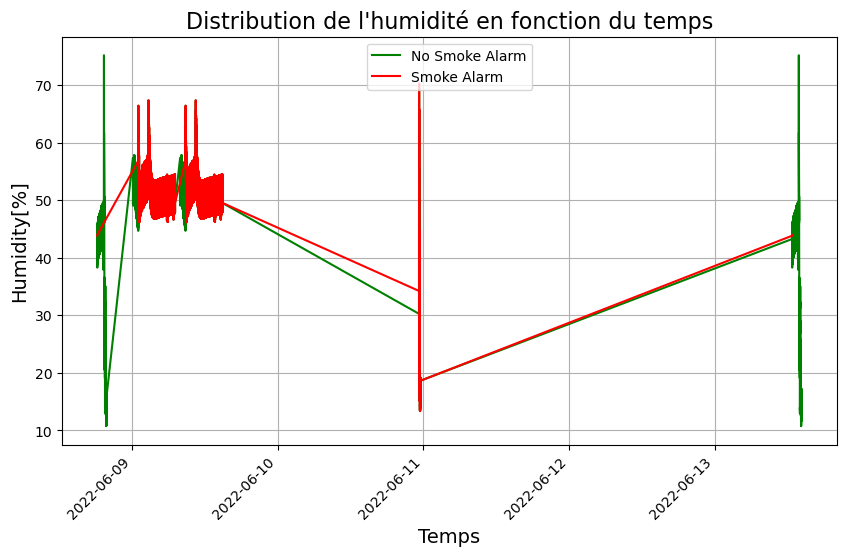

In [25]:
mask_fire_alarm = data['Smoke Alarm'] == 1
plt.figure(figsize=(10, 6))
#plt.plot(data.index, data['Temperature[C]'], color='green', label='No Fire Alarm')
#plt.plot(data.index[mask_fire_alarm], data['Temperature[C]'][mask_fire_alarm], color='red', label='Fire Alarm')
data['Humidity[%]'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'Humidity[%]'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('Humidity[%]', fontsize=14)
plt.title("Distribution de l'humidité en fonction du temps", fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

In [26]:
#La répartition de l'humidité est asymétrique, La majorité des humidités sont entre 46 % et 57 %.
#Les fumée ont généralement des taux d'humidité de 46 % à 56 %.
#La majorité des humidités n'entraînent pas de baisse alarmante des feux entre 40 % et 54 %.
#La moyenne d'humidité sans alarme feu est de 42,93 %.
#La moyenne d'humidité qui déclenche une alarme feu est de 50,78 %.

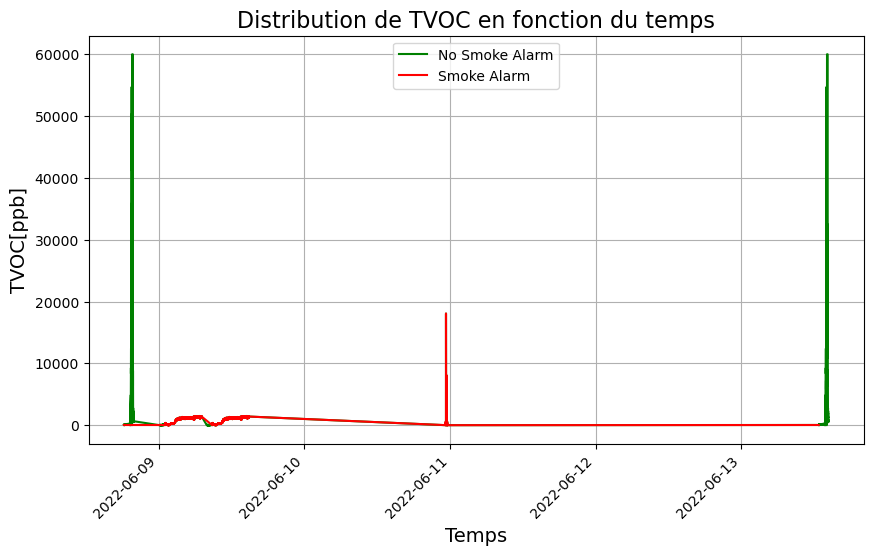

In [27]:
mask_fire_alarm = data['Smoke Alarm'] == 1
plt.figure(figsize=(10, 6))

data['TVOC[ppb]'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'TVOC[ppb]'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('TVOC[ppb]', fontsize=14)
plt.title('Distribution de TVOC en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

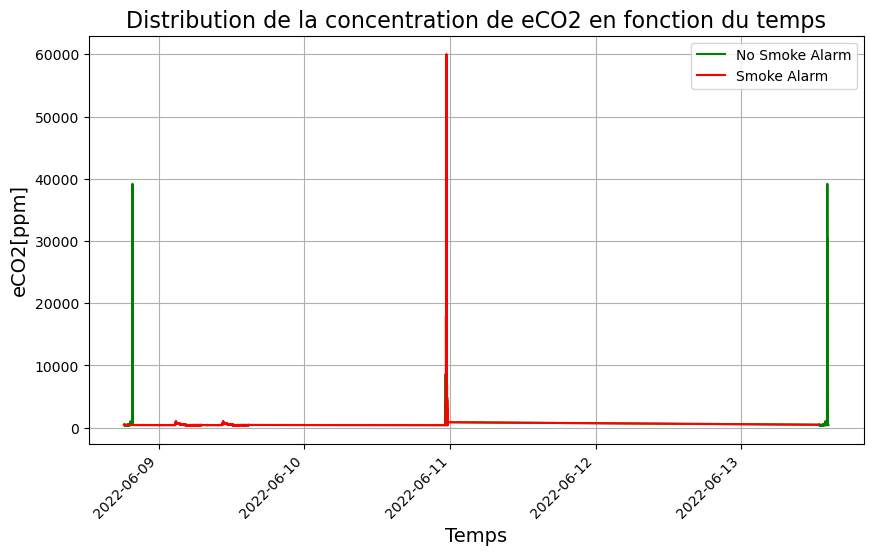

In [28]:
mask_fire_alarm = data['Smoke Alarm'] == 1

# Conversion des données 'eCO2[ppm]' en type numérique
data['eCO2[ppm]'] = pd.to_numeric(data['eCO2[ppm]'], errors='coerce')

# Tracer les données
plt.figure(figsize=(10, 6))

# Tracer la température
data['eCO2[ppm]'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'eCO2[ppm]'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('eCO2[ppm]', fontsize=14)
plt.title('Distribution de la concentration de eCO2 en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

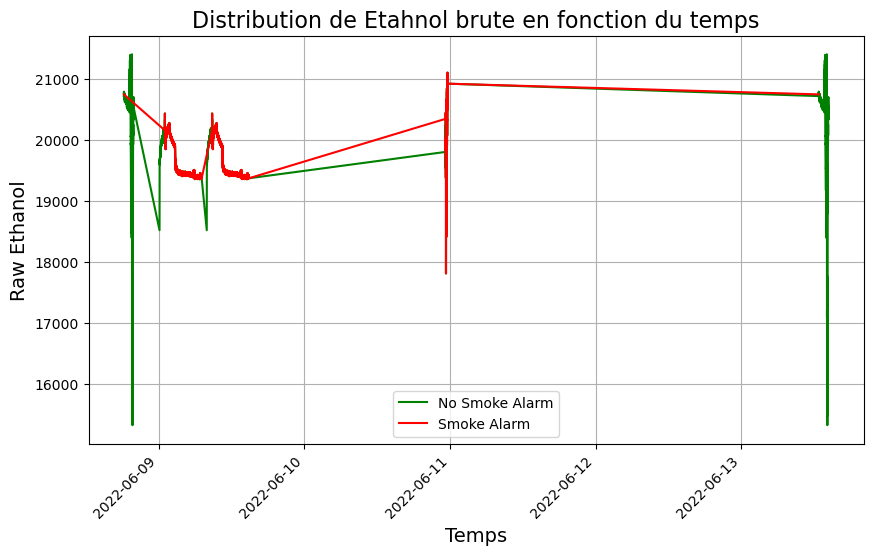

In [29]:
mask_fire_alarm = data['Smoke Alarm'] == 1
plt.figure(figsize=(10, 6))

data['Raw Ethanol'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'Raw Ethanol'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('Raw Ethanol', fontsize=14)
plt.title('Distribution de Etahnol brute en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

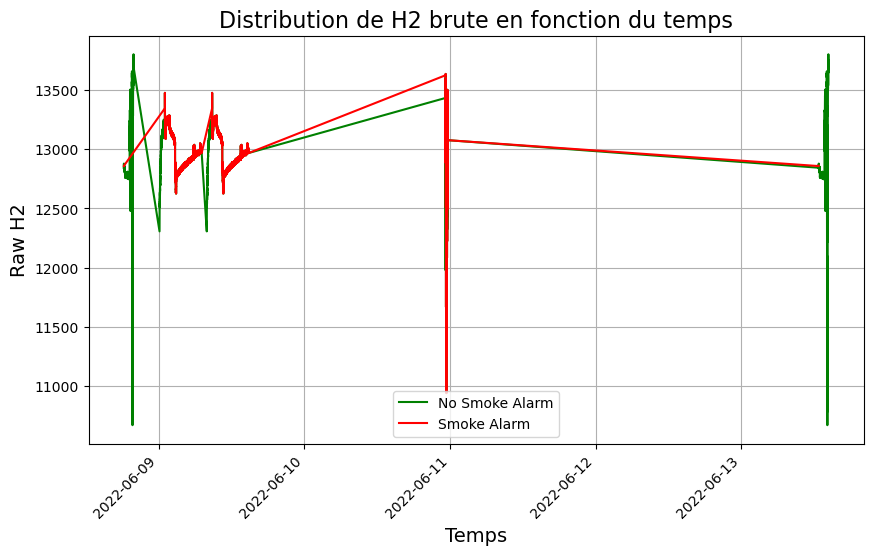

In [30]:
mask_fire_alarm = data['Smoke Alarm'] == 1
plt.figure(figsize=(10, 6))

data['Raw H2'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'Raw H2'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('Raw H2', fontsize=14)
plt.title('Distribution de H2 brute en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

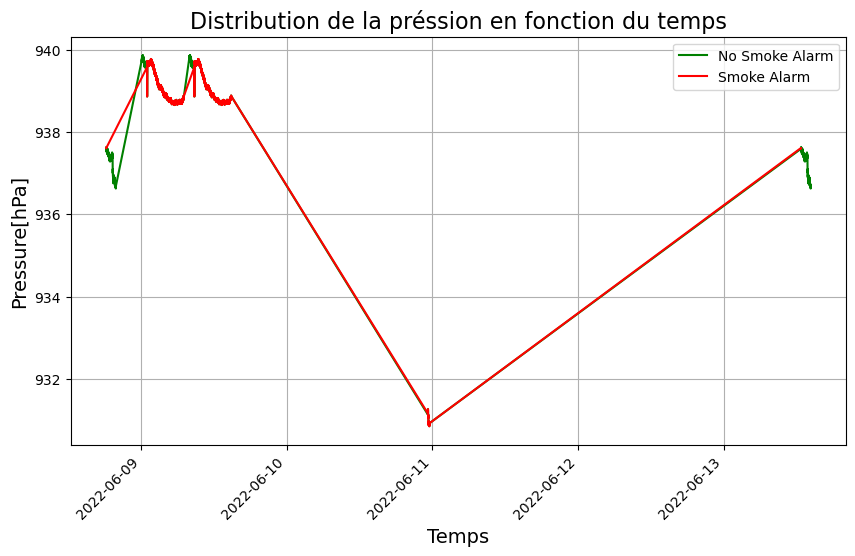

In [31]:
mask_fire_alarm = data['Smoke Alarm'] == 1
plt.figure(figsize=(10, 6))

data['Pressure[hPa]'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'Pressure[hPa]'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('Pressure[hPa]', fontsize=14)
plt.title('Distribution de la préssion en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

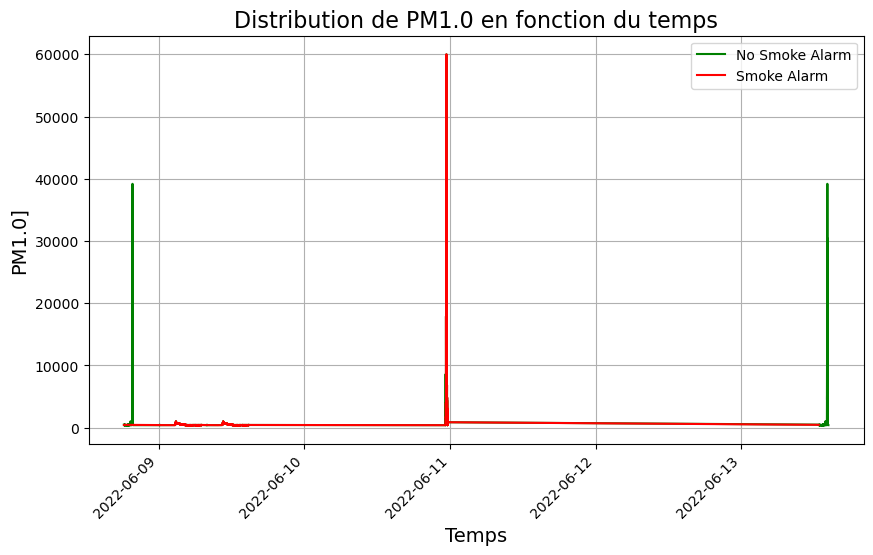

In [32]:
mask_fire_alarm = data['Smoke Alarm'] == 1

# Conversion des données 'eCO2[ppm]' en type numérique
data['PM1.0'] = pd.to_numeric(data['eCO2[ppm]'], errors='coerce')

# Tracer les données
plt.figure(figsize=(10, 6))

# Tracer la température
data['PM1.0'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'PM1.0'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('PM1.0]', fontsize=14)
plt.title('Distribution de PM1.0 en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

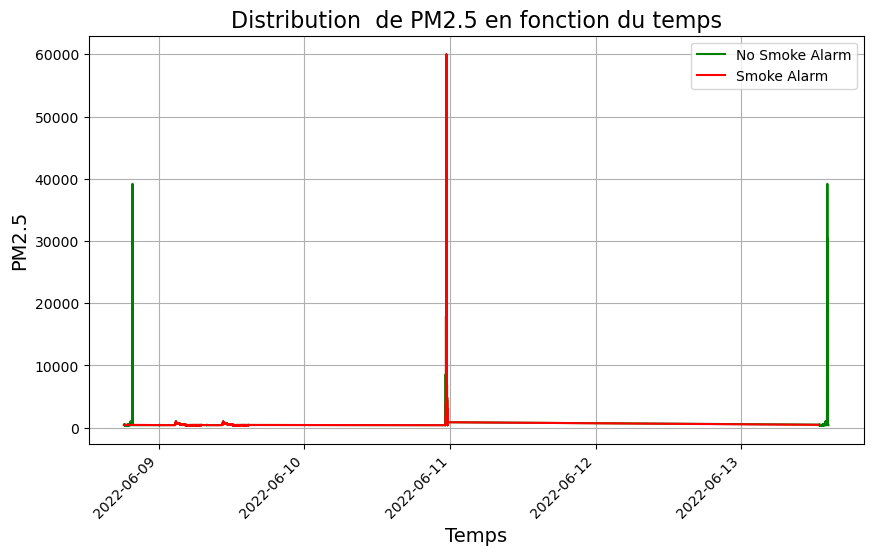

In [33]:
mask_fire_alarm = data['Smoke Alarm'] == 1

# Conversion des données 'eCO2[ppm]' en type numérique
data['PM2.5'] = pd.to_numeric(data['eCO2[ppm]'], errors='coerce')

# Tracer les données
plt.figure(figsize=(10, 6))

# Tracer la température
data['PM2.5'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'PM2.5'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('PM2.5', fontsize=14)
plt.title('Distribution  de PM2.5 en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

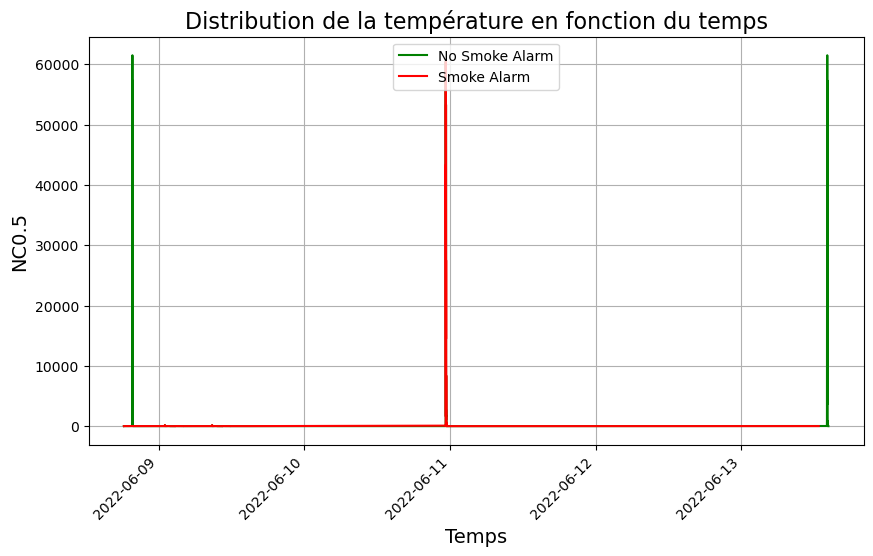

In [34]:
mask_fire_alarm = data['Smoke Alarm'] == 1
plt.figure(figsize=(10, 6))

data['NC0.5'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'NC0.5'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('NC0.5', fontsize=14)
plt.title('Distribution de la température en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

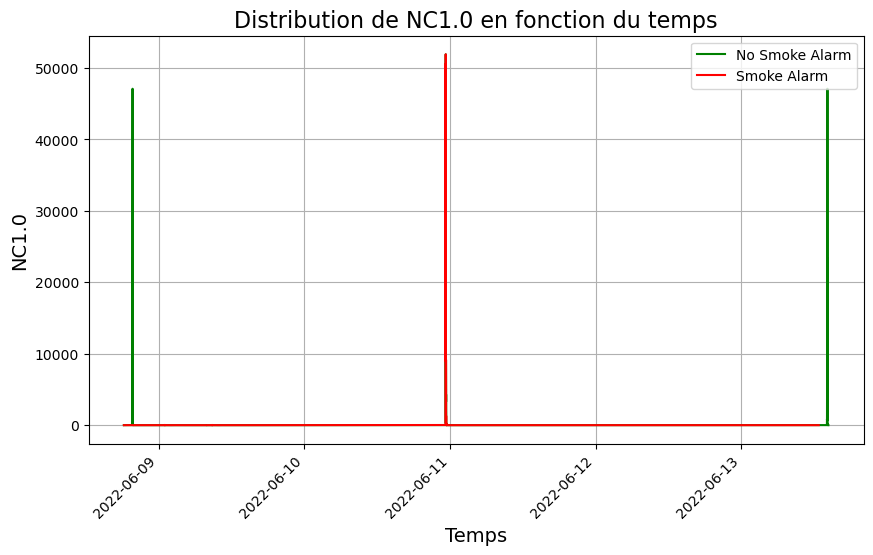

In [35]:
mask_fire_alarm = data['Smoke Alarm'] == 1
plt.figure(figsize=(10, 6))

data['NC1.0'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'NC1.0'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('NC1.0', fontsize=14)
plt.title('Distribution de NC1.0 en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

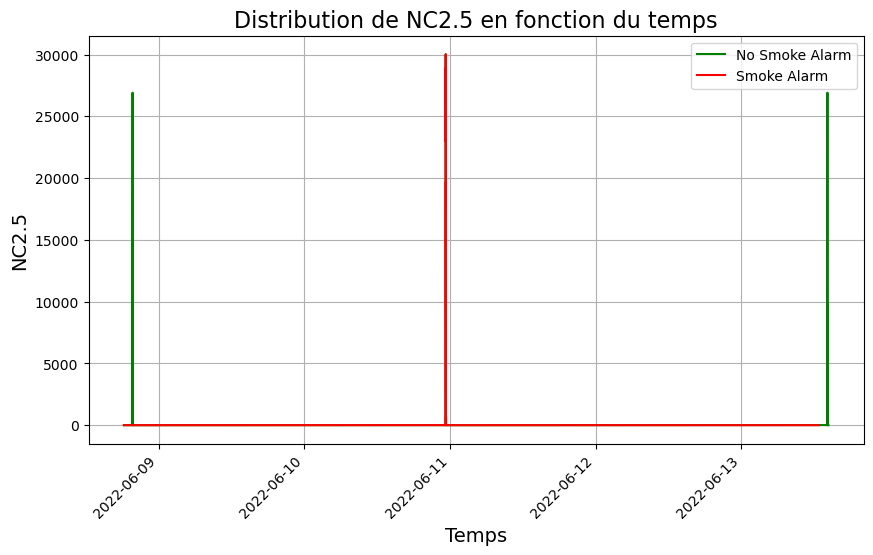

In [36]:
mask_fire_alarm = data['Smoke Alarm'] == 1
plt.figure(figsize=(10, 6))

data['NC2.5'].plot(color='green', label='No Smoke Alarm')
data.loc[mask_fire_alarm, 'NC2.5'].plot(color='red', label='Smoke Alarm')

plt.xlabel('Temps', fontsize=14)
plt.ylabel('NC2.5', fontsize=14)
plt.title('Distribution de NC2.5 en fonction du temps', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

In [37]:
#la distribution des valeurs d'existence de l'éthanol brut est visiblement asymétrique. Les valeurs typiques varient de 19 250 ppm à 20 900 ppm.
#La majorité des valeurs d'existence de l'éthanol brut se situent entre 19 250 ppm et 20 300 ppm, ce qui est une baisse alarmante du risque d'incendie.
#La majorité des valeurs d'existence de l'éthanol brut ne présentent pas de baisse alarmante entre 19 600 ppm et 21 100 ppm.
#La quantité d'éthanol brut qui ne provoque pas d'alarme incendie est d'environ 20082,82 ppm en moyenne.
#La valeur d'existence moyenne de l'éthanol brut provoquant une alarme incendie est de 19623,05 ppm.

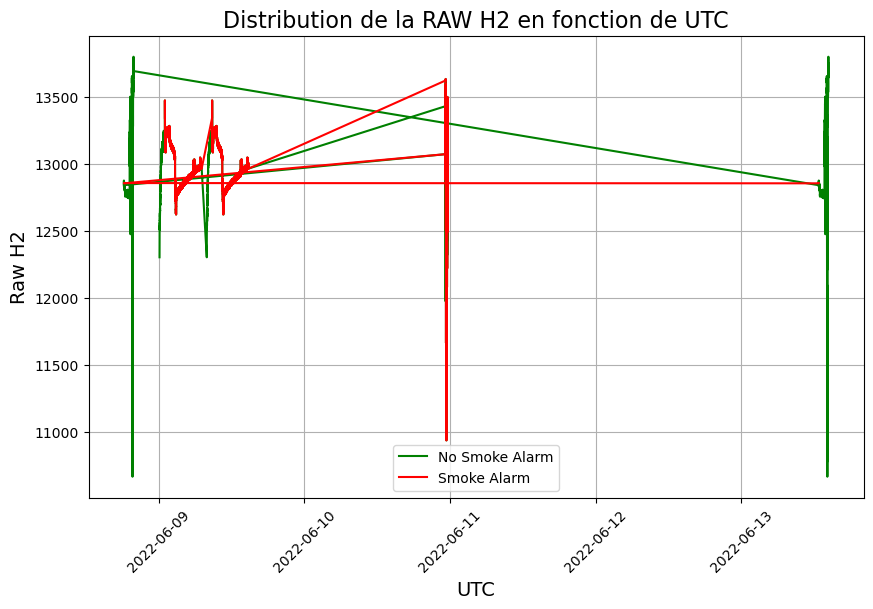

In [40]:
mask_fire_alarm = data['Smoke Alarm'] == 1

# Tracé de la distribution de la température en fonction de UTC
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Raw H2'], color='green', label='No Smoke Alarm')
plt.plot(data.index[mask_fire_alarm], data['Raw H2'][mask_fire_alarm], color='red', label='Smoke Alarm')

plt.xlabel('UTC', fontsize=14)
plt.ylabel('Raw H2', fontsize=14)
plt.title('Distribution de la RAW H2 en fonction de UTC', fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.legend()
plt.show()

In [ ]:
#La distribution des valeurs d'existence de l'hydrogène brut est asymétrique. Les valeurs typiques varient de 12500 ppm à 13400 ppm.
#La plupart des valeurs d'existence de l'hydrogène brut se situent entre 12750 ppm et 13300 ppm, ce qui est une baisse alarmante.
#La majorité des valeurs d'existence de l'hydrogène brut ne présentent pas de baisse significative entre 12500 ppm et 13700 ppm.
#12896 ppm d'hydrogène brut qui ne provoque pas d'alarme incendie sont la valeur moyenne d'existence.
#La valeur d'existence moyenne de l'hydrogène brut provoquant une alarme incendie est de 12960 ppm.

In [ ]:
#La plupart des valeurs de pression atmosphérique se situent entre 936,6 hPa et 937,7 hPa ou entre 938,7 hPa et 939,9 hPa.
#La chute alarmante des incendies se produit entre 938,7 hPa et 939,9 hPa en raison de la majorité des valeurs de pression atmosphérique.
#La chute alarmante de la pression entre 936,6 hPa et 937,7 hPa n'est pas provoquée par la majorité des valeurs de pression atmosphérique.
#La pression  qui ne provoque pas d'alarme est de 938,1 hPa en moyenne.
#La pression  qui déclenche une alarme est de 938,8 hPa en moyenne.

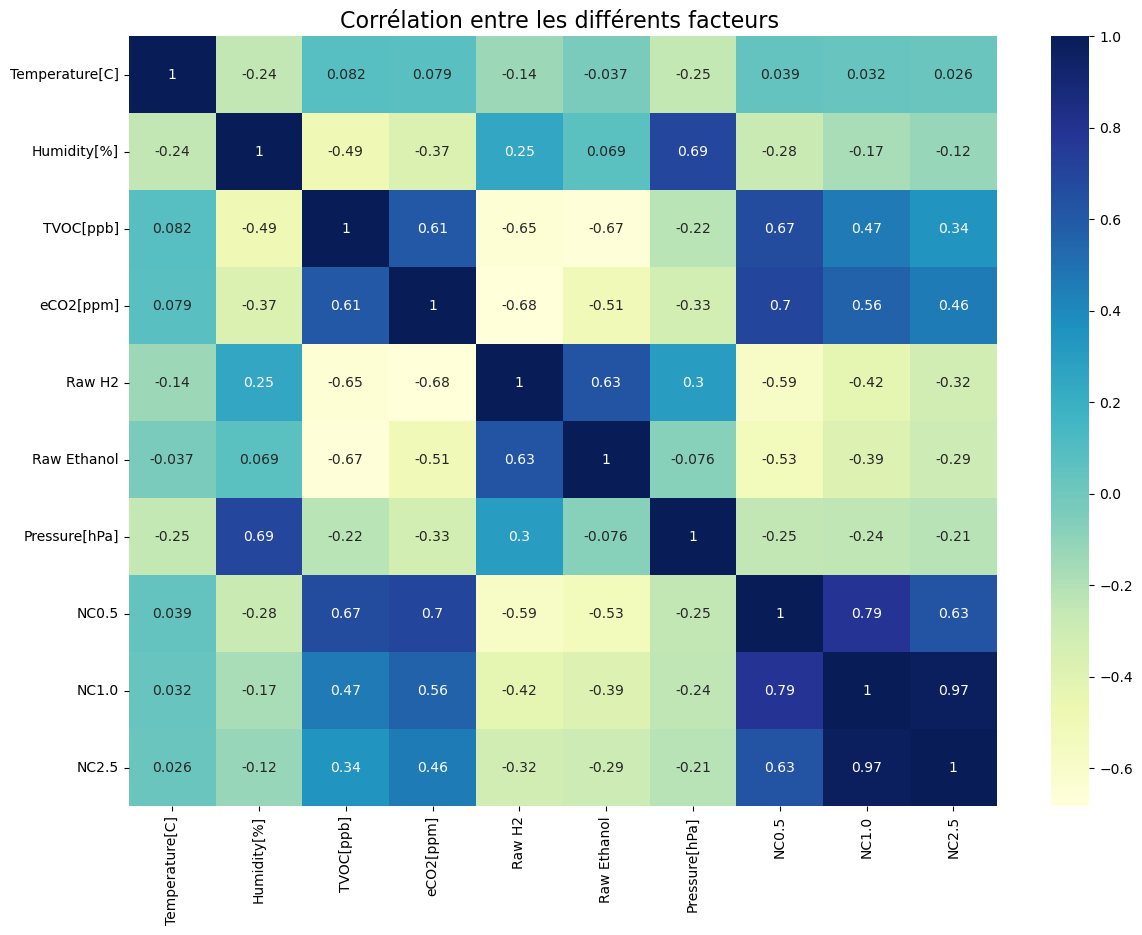

In [60]:
# Visualisation des données 
#Corrélation des données 
import seaborn as sns
data_except_fire_alarm = data.drop(columns=['Smoke Alarm'])
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(data_except_fire_alarm.corr(), annot=True, cmap='YlGnBu')
heatmap.set_title('Corrélation entre les différents facteurs ', fontsize=16)
plt.show()

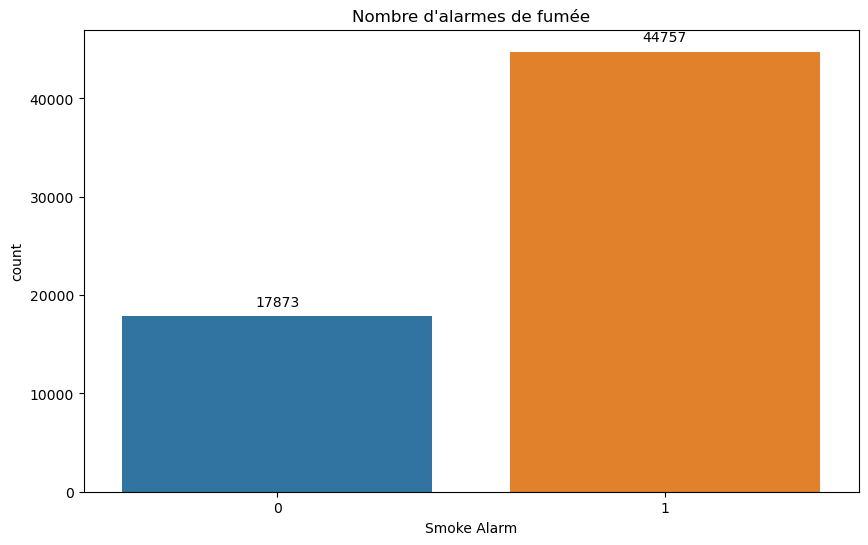

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Tracer le countplot pour le nombre de "Smoke Alarms"
ax = sns.countplot(data=data, x='Smoke Alarm', ax=axes)
ax.set_title("Nombre d'alarmes de fumée")

# Ajouter des étiquettes de barre
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()


In [9]:
#données divisées 
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


y = data['Smoke Alarm']
x = data.drop('Smoke Alarm', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((43841, 13), (18789, 13), (43841,), (18789,))

In [10]:
#Étalonnage des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

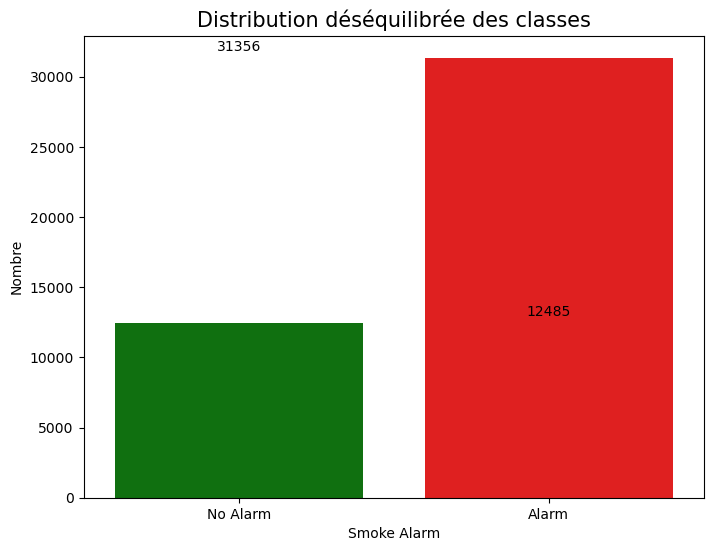

In [11]:
class_counts = y_train.value_counts()

colors = {0: 'green', 1: 'red'}
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette=colors)
for i, count in enumerate(class_counts):
    plt.text(x=i, y=count + 500, s=count, ha='center')
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.ylabel('Nombre')
plt.title('Distribution déséquilibrée des classes', fontsize=15)
plt.show()


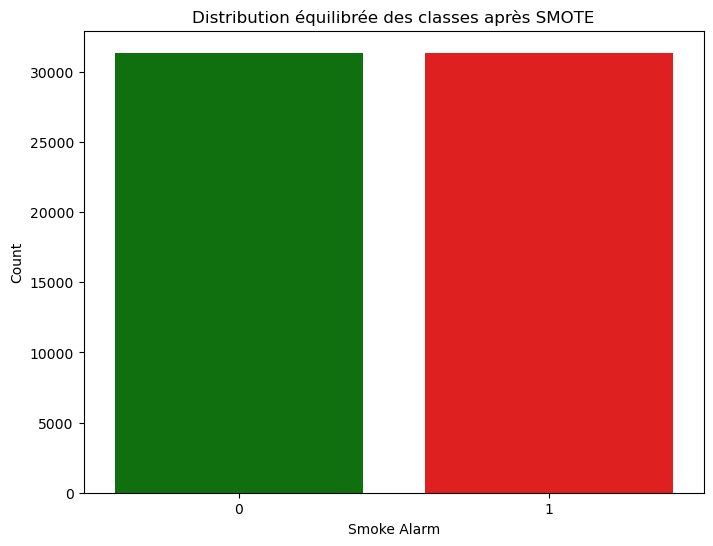

In [12]:
# Équilibrer les classes
from imblearn.over_sampling import SMOTE
colors = {0: 'green', 1: 'red'}
smote = SMOTE(random_state=10) 
X_train, y_train = smote.fit_resample(X_train, y_train)

# Visualiser la distribution équilibrée avec un diagramme à barres
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette=colors)
plt.title('Distribution équilibrée des classes après SMOTE')
plt.xlabel('Smoke Alarm')
plt.ylabel('Count')
plt.show()

In [27]:
#classification

In [66]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à rechercher dans la grille
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}

# Créer un modèle SVM
svm_model = SVC()

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle trouvé
best_svm_model = grid_search.best_estimator_

# Évaluer le modèle sur les données de test
test_accuracy = best_svm_model.score(X_test, y_test)
print("Précision sur les données de test:", test_accuracy)

KeyboardInterrupt: 

Accuracy: 90.00%
Precision: 97.01%
Recall: 89.48%
F1 Score: 93.09%


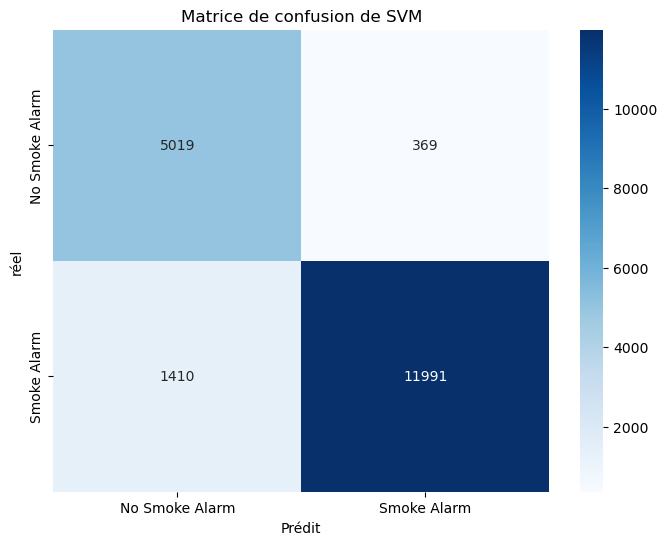

In [27]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

# SVM Classifier with L1 regularization
svm_model = LinearSVC(C=1, penalty='l1', dual=False)

# Fit the model on the balanced training data
svm_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_svm * 100:.2f}%")

# Compute confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Smoke Alarm', 'Smoke Alarm'], yticklabels=['No Smoke Alarm', 'Smoke Alarm'])
cm = confusion_matrix(y_test, y_pred)
plt.title("Matrice de confusion de SVM")
plt.xlabel('Prédit')
plt.ylabel('réel')

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

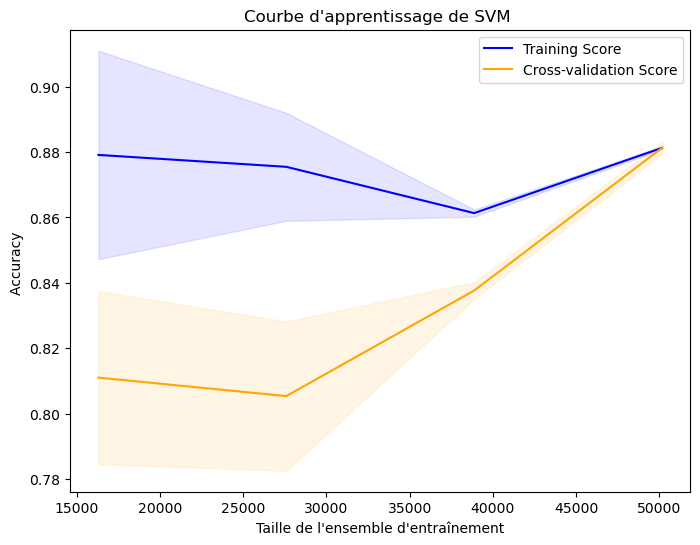

In [117]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train_ridge, y_train, cv=5, n_jobs=-1)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Courbe d'apprentissage de SVM ")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Accuracy ")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation Score", color="orange")

plt.legend()
plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced'],
    'multi_class': ['auto']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Best Parameters: {'C': 1, 'class_weight': None, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 90.32%


Accuracy: 90.54%


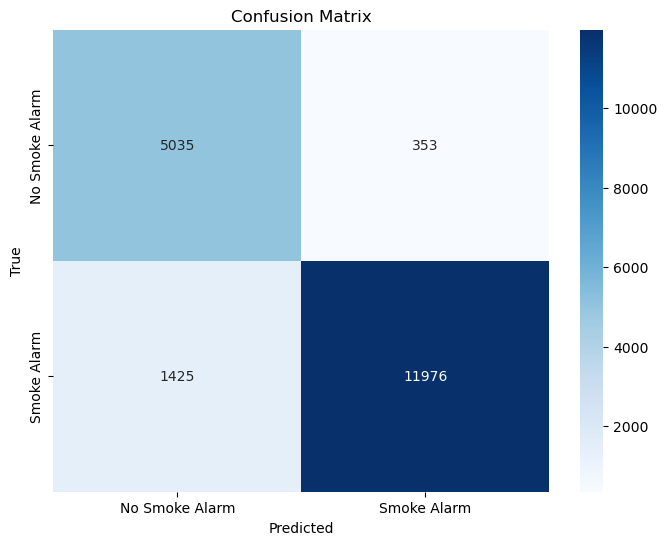

Precision: 97.14%
Recall: 89.37%
F1 Score: 93.09%


In [13]:
 #C=0.1,  # Réduire la régularisation pour rendre le modèle moins précis
    #class_weight=None,  # Pas de pondération de classe
    #l1_ratio=None,  # Le ratio entre la norme L1 et L2 dans la régularisation Elastic-Net
    #multi_class='auto',  # Stratégie multiclasse
    #penalty='l2',  # Norme utilisée dans la pénalisation
    #solver='lbfgs',  # Algorithme à utiliser dans le problème d'optimisation

# Regression logistique
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( C=1,  class_weight=None, l1_ratio=None,  multi_class='auto',  penalty='l2',  solver='newton-cg')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Smoke Alarm', 'Smoke Alarm'], yticklabels=['No Smoke Alarm', 'Smoke Alarm'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

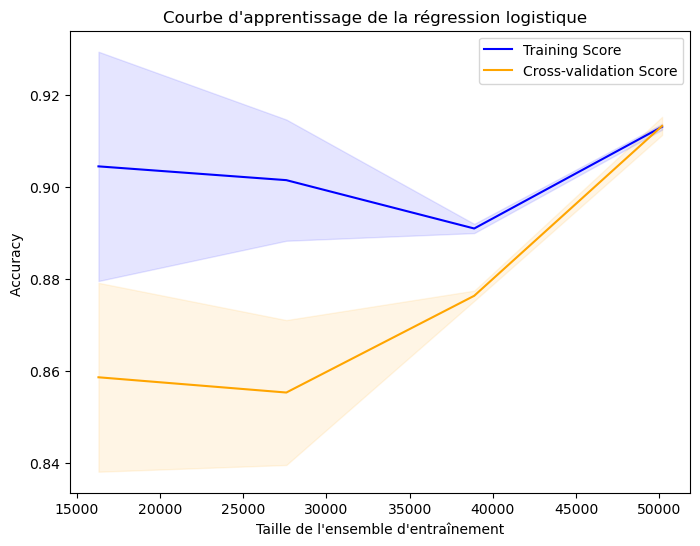

In [22]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np 


train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Courbe d'apprentissage de la régression logistique  ")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Accuracy ")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation Score", color="orange")

plt.legend()
plt.show()


In [85]:
knn_model = KNeighborsClassifier()

# Définir la grille de paramètres à rechercher
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Nombre de voisins
    'weights': ['uniform', 'distance'],  # Poids uniformes ou distance
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Différentes métriques de distance
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Exécuter la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print(f"Meilleurs paramètres trouvés pour lr KNN : {grid_search.best_params_}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres trouvés pour lr KNN : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Accuracy : 85.30%


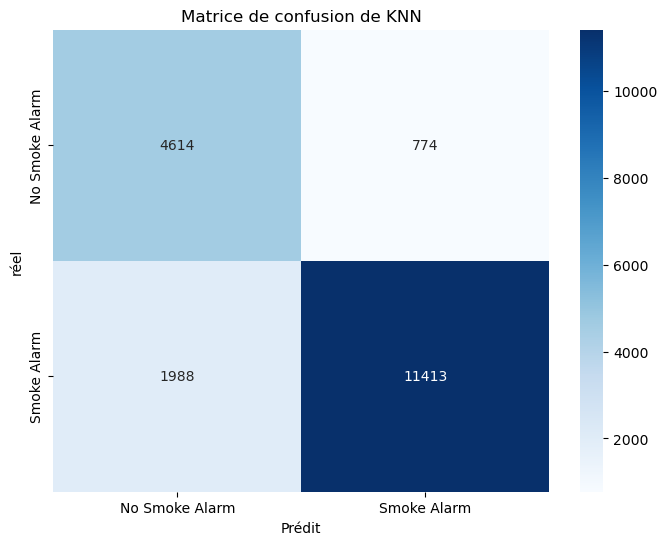

In [99]:
#KNN


from sklearn.linear_model import Ridge

import numpy as np

# Apply Ridge regularization to the feature matrix
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_new, y_train)
X_train_ridge = ridge.predict(X_train_new)[:, np.newaxis]
X_test_ridge = ridge.predict(X_test_new)[:, np.newaxis]

# Train the KNN model on the regularized feature matrix
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(X_train_ridge, y_train)
y_pred_knn = knn_model.predict(X_test_ridge)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy : {accuracy_knn * 100:.2f}%")

# Afficher la matrice de confusion pour k-NN
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Smoke Alarm', 'Smoke Alarm'], yticklabels=['No Smoke Alarm', 'Smoke Alarm'])
plt.title("Matrice de confusion de KNN")
plt.xlabel('Prédit')
plt.ylabel('réel')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy : 88.27%


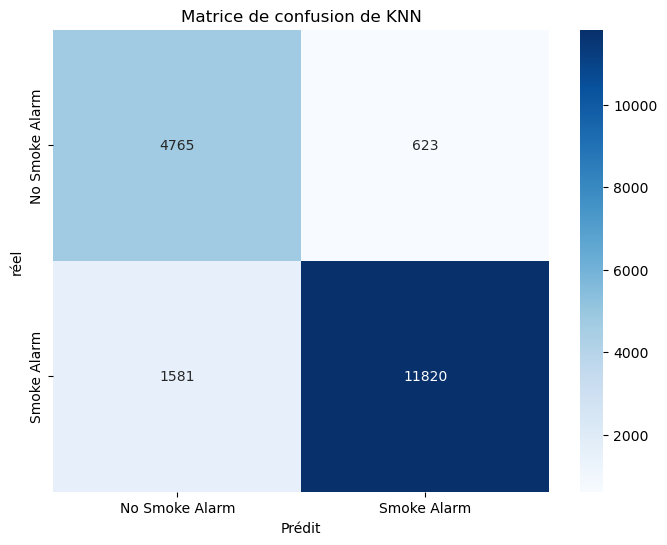

Precision: 97.01%
Recall: 89.48%
F1 Score: 93.09%


In [29]:

from sklearn.linear_model import Ridge

import numpy as np

# Apply Ridge regularization to the feature matrix
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
X_train_ridge = ridge.predict(X_train)[:, np.newaxis]
X_test_ridge = ridge.predict(X_test)[:, np.newaxis]

# Train the KNN model on the regularized feature matrix
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(X_train_ridge, y_train)
y_pred_knn = knn_model.predict(X_test_ridge)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy : {accuracy_knn * 100:.2f}%")

# Afficher la matrice de confusion pour k-NN
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Smoke Alarm', 'Smoke Alarm'], yticklabels=['No Smoke Alarm', 'Smoke Alarm'])
plt.title("Matrice de confusion de KNN")
plt.xlabel('Prédit')
plt.ylabel('réel')
plt.show()
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

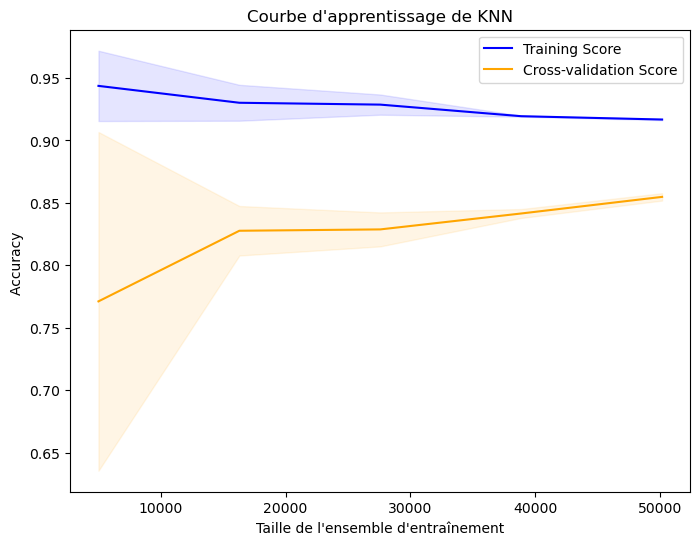

In [96]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(knn_model, X_train_ridge, y_train, cv=5, n_jobs=-1)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Courbe d'apprentissage de KNN")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Accuracy ")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation Score", color="orange")

plt.legend()
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Définir la grille de paramètres à rechercher
param_grid = {
    'max_depth': [3, 5, 7, 9],  # Profondeur maximale de l'arbre
    'min_samples_leaf': [1, 3, 5, 7, 10]  # Nombre minimum d'échantillons dans une feuille
}

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Exécuter la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print(f"Meilleurs paramètres trouvés : {grid_search.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres trouvés : {'max_depth': 9, 'min_samples_leaf': 1}


Accuracy: 96.26%


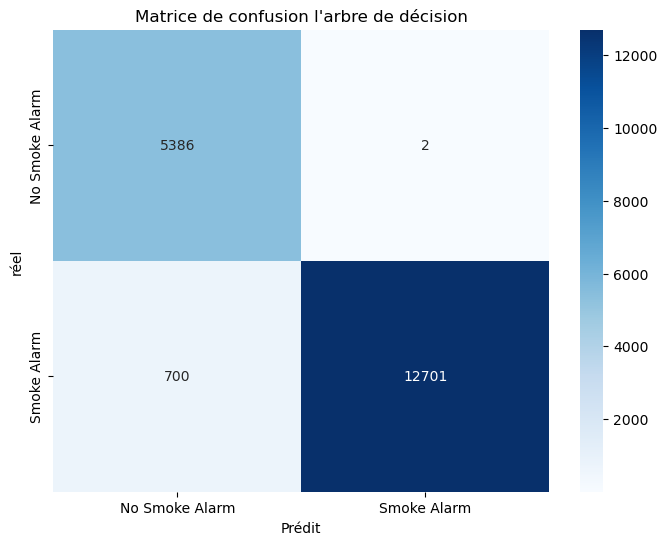

Classification Report:
                precision    recall  f1-score   support

No Smoke Alarm       0.88      1.00      0.94      5388
   Smoke Alarm       1.00      0.95      0.97     13401

      accuracy                           0.96     18789
     macro avg       0.94      0.97      0.96     18789
  weighted avg       0.97      0.96      0.96     18789



In [98]:
# Modèle d'arbre de décision avec hyperparamètres ajustés
dt_model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1, min_samples_split=10, random_state=42)

# Entraîner le modèle sur les données d'entraînement
dt_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_dt = dt_model.predict(X_test)

# Calcul de l'exactitude
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt * 100:.2f}%")

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Smoke Alarm', 'Smoke Alarm'], yticklabels=['No Smoke Alarm', 'Smoke Alarm'])
plt.title("Matrice de confusion l'arbre de décision")
plt.xlabel('Prédit')
plt.ylabel('réel')
plt.show()

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Smoke Alarm', 'Smoke Alarm']))

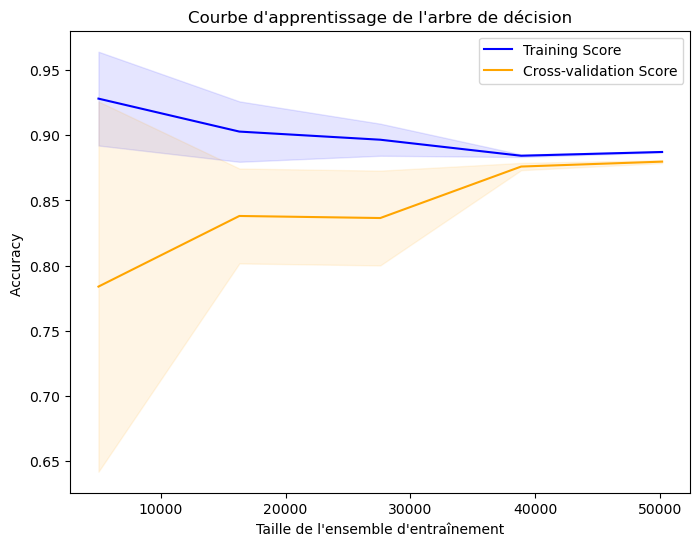

In [97]:

train_sizes, train_scores, test_scores = learning_curve(dt_model, X_train_ridge, y_train, cv=5, n_jobs=-1)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title("Courbe d'apprentissage de l'arbre de décision")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Accuracy ")


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation Score", color="orange")

plt.legend()
plt.show()

In [55]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis pour être une feuille
}

# 3. Configurer GridSearchCV
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid,
                              cv=5,  # Nombre de plis pour la validation croisée
                              n_jobs=-1,  # Utiliser tous les cœurs CPU disponibles
                              verbose=2)  # Afficher les détails de la progression

# 4. Exécuter la recherche par grille sur les données d'entraînement
rf_grid_search.fit(X_train, y_train)

# 5. Afficher les meilleurs paramètres trouvés
print(f"Meilleurs paramètres trouvés : {rf_grid_search.best_params_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleurs paramètres trouvés : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Accuracy: 98.16%


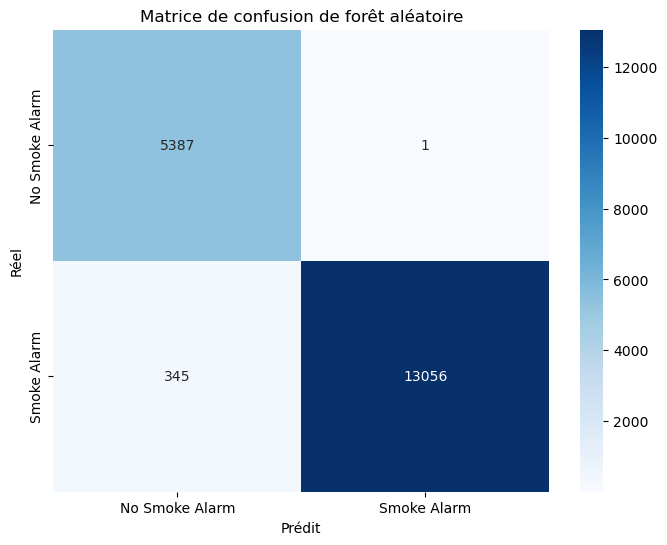

Precision: 97.01%
Recall: 89.48%
F1 Score: 93.09%


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Modèle de forêt aléatoire ajusté pour réduire le surapprentissage
best_rf_model = RandomForestClassifier(
    n_estimators=100,          # Augmenter le nombre d'arbres
    max_depth=10,              # Limiter la profondeur des arbres
    min_samples_split=5,       # Augmenter le nombre minimal d'échantillons pour diviser un nœud
    min_samples_leaf=4,        # Augmenter le nombre minimal d'échantillons pour être une feuille
    max_features='sqrt',       # Utiliser la racine carrée du nombre total de fonctionnalités
    random_state=42
)

# Entraîner le modèle sur les données d'entraînement
best_rf_model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_rf = best_rf_model.predict(X_test)

# Calculer l'exactitude
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf * 100:.2f}%")

# Afficher la matrice de confusion pour Random Forest
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Smoke Alarm', 'Smoke Alarm'], yticklabels=['No Smoke Alarm', 'Smoke Alarm'])
plt.title("Matrice de confusion de forêt aléatoire")
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

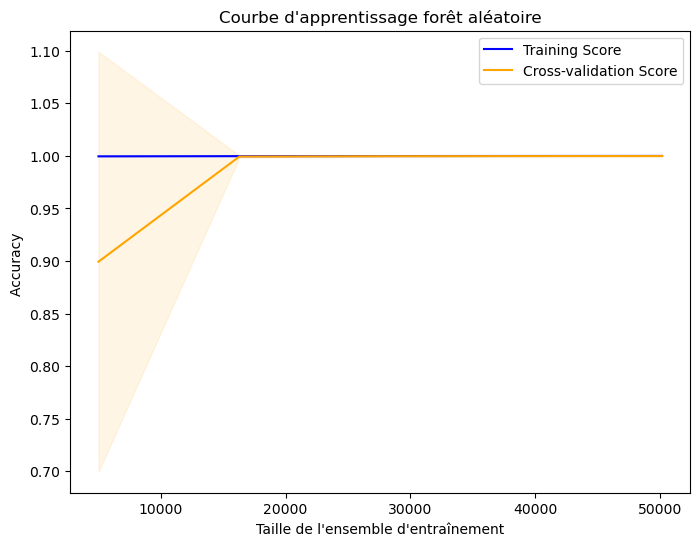

In [35]:
train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X_train, y_train, cv=5, n_jobs=-1)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title("Courbe d'apprentissage forêt aléatoire")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Accuracy ")


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation Score", color="orange")

plt.legend()
plt.show()

Accuracy: 76.34%


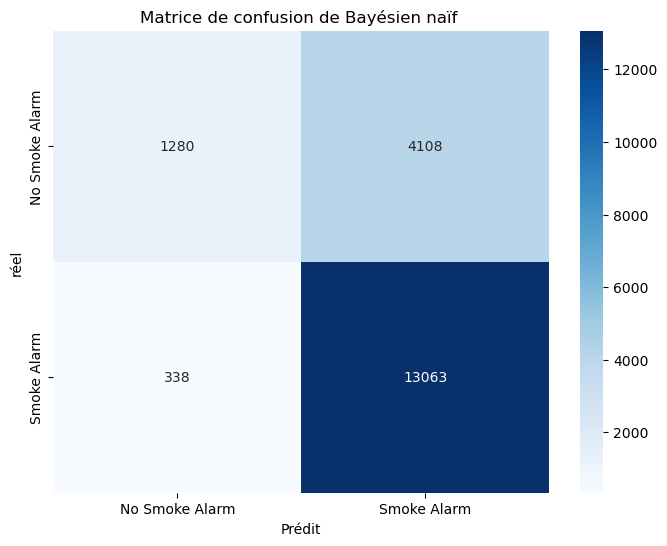

Classification Report:
                precision    recall  f1-score   support

No Smoke Alarm       0.79      0.24      0.37      5388
   Smoke Alarm       0.76      0.97      0.85     13401

      accuracy                           0.76     18789
     macro avg       0.78      0.61      0.61     18789
  weighted avg       0.77      0.76      0.71     18789



In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Créer et entraîner le modèle GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Utiliser le modèle pour faire des prédictions
y_pred_nb = nb_model.predict(X_test)

# Calculer et afficher l'exactitude
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb * 100:.2f}%")

# Afficher la matrice de confusion pour Naive Bayes
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Smoke Alarm', 'Smoke Alarm'], yticklabels=['No Smoke Alarm', 'Smoke Alarm'])
plt.title("Matrice de confusion de Bayésien naïf ")
plt.xlabel('Prédit')
plt.ylabel('réel')
plt.show()

# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['No Smoke Alarm', 'Smoke Alarm']))





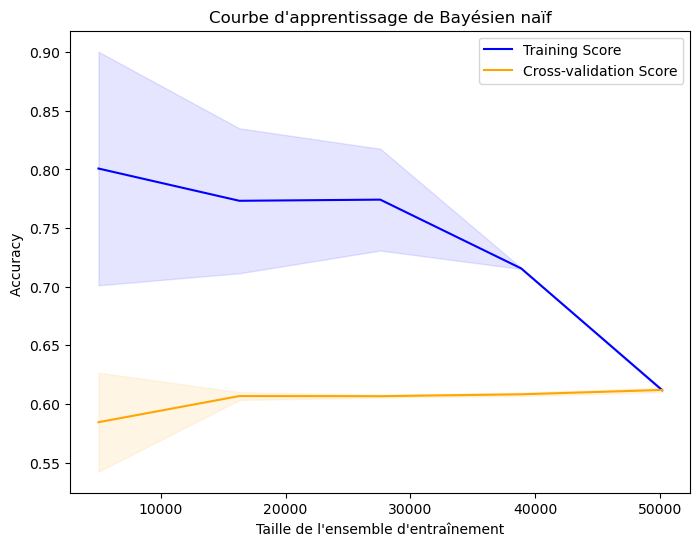

In [112]:
train_sizes, train_scores, test_scores = learning_curve(nb_model, X_train, y_train, cv=5, n_jobs=-1)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title("Courbe d'apprentissage de Bayésien naïf")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Accuracy ")


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation Score", color="orange")

plt.legend()
plt.show()

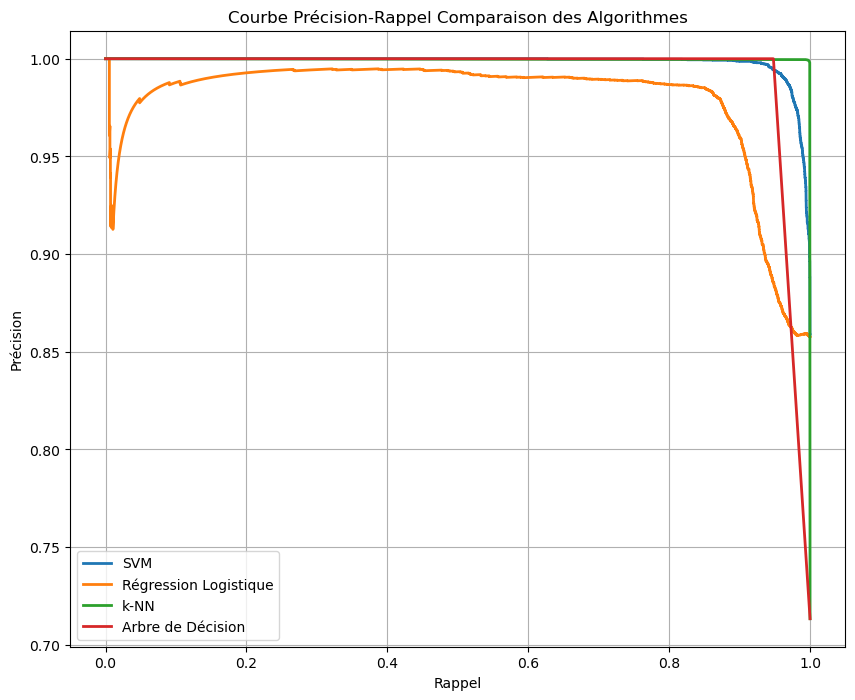

In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Ajuster le modèle SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Calculer les probabilités de décision pour SVM
svm_probs = svm_model.decision_function(X_test)

# Calculer les probabilités de prédiction pour les autres modèles
lg_probs = model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Calculer la précision et le rappel pour chaque modèle
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
lg_precision, lg_recall, _ = precision_recall_curve(y_test, lg_probs)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)

# Tracer la courbe précision-rappel pour chaque modèle
plt.figure(figsize=(10, 8))
plt.plot(svm_recall, svm_precision, label='SVM', linewidth=2)
plt.plot(lg_recall, lg_precision, label='Régression Logistique', linewidth=2)
plt.plot(knn_recall, knn_precision, label='k-NN', linewidth=2)
plt.plot(dt_recall, dt_precision, label='Arbre de Décision', linewidth=2)
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel Comparaison des Algorithmes')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))

# Modèle SVM
plt.plot(range(len(y_test)), y_test, label='Real', color='blue', linestyle='-')
plt.plot(range(len(y_pred_svm)), y_pred_svm, label='Predicted (SVM)', color='red', linestyle='--')

# Modèle Régression Logistique
plt.plot(range(len(y_test)), y_test, label='Real', color='blue', linestyle='-')
plt.plot(range(len(y_pred_logistic)), y_pred_logistic, label='Predicted (Logistic Regression)', color='green', linestyle='-.')

# Modèle Arbre de Décision
plt.plot(range(len(y_test)), y_test, label='Real', color='blue', linestyle='-')
plt.plot(range(len(y_pred_dt)), y_pred_dt, label='Predicted (Decision Tree)', color='orange', linestyle='-')

# Modèle k-NN
plt.plot(range(len(y_test)), y_test, label='Real', color='blue', linestyle='-')
plt.plot(range(len(y_pred_knn)), y_pred_knn, label='Predicted (k-NN)', color='purple', linestyle='-')

# Ajouter des légendes et des titres
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Comparison of Real and Predicted Values for Multiple Models')
plt.legend()
plt.grid(True)
plt.show()